In [1]:
#importation du jeu de données 
#nous travaillerons sur le jeu de données accessoires "Diabetes" inclus dans scikit-learn
#https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)
print("Dimension inputs : ", X.shape)
print("Dimension target : ", y.shape)

Dimension inputs :  (442, 10)
Dimension target :  (442,)


In [2]:
#pre-traitement du jeu de données : séparation du jeu de données et normalisation des données
#séparation du jeu de données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#normalisation du jeu de données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#entrainement d'une régression LASSO 
#le LASSO n'a pas de solution analytique
#par défaut sous sklearn, la classe linear_model.Lasso implémente une déscente de gradient coordonnée pour solutionner
#on emploi la régression LASSO parce que nous soupsçonnons une sparsité du vecteur des coefficients
#ceci induit une sélection des variables
from sklearn.linear_model import Lasso
a = 10
reg = Lasso(alpha = a)
reg.fit(X_train, y_train)
print("Coefficients : ", reg.coef_)
print("Intercept : ", reg.intercept_)

Coefficients :  [ 0.         -0.         22.52644026  7.60326197 -0.         -0.
 -2.81570825  0.         20.7120656   0.        ]
Intercept :  152.10271903323263


In [4]:
#entrainement d'une régression linéaire sans régularisation par équation normale
#...et comparaison des résultats des coefficients
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
print("Coefficients : ", reg_lin.coef_)
print("Intercept : ", reg_lin.intercept_)

#on peut constater que le coefficient constantn'est pas régularisé
#seul les coefficients de pondération sont régularisée

Coefficients :  [ -1.33360912 -12.14277618  25.10694477  16.12011639 -22.33461104
   5.06153101   0.40406607  11.46749263  30.48175237   5.89602419]
Intercept :  152.10271903323263


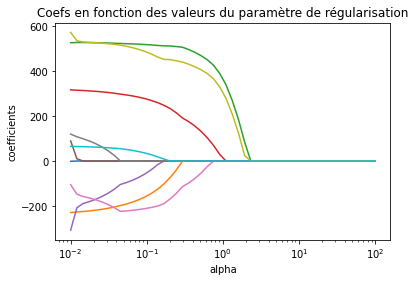

In [5]:
#traçons le chemin de régularisation
#...c'est-à-dire l'évolution des coefficients de régression en fonction 
#...d'un espace de valeurs de l'hyperparamètre de régularisation
import numpy as np
import matplotlib.pyplot as plt
#définition de l'espace de l'hyperparamètre
n_alphas = 50
alphas = np.logspace(-2, 2, n_alphas)
#apprentissage de la régression lasso pour chaque valeur de l'hyperparamètre
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
#tracé du chemin de régularisation
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Coefs en fonction des valeurs du paramètre de régularisation")
plt.axis("tight")
plt.show()

In [6]:
#recherche du meilleur paramètre de régularisation par Grille-Complète
from sklearn.model_selection import GridSearchCV
#définition de l'espace de l'hyperparamètre
n_alphas = 50
alphas = np.logspace(-2, 2, n_alphas)
#réalisation de la recherche par grille complète
parameters = {"alpha" : alphas}
lasso = Lasso()
lasso_gridcv = GridSearchCV(lasso, parameters)
lasso_gridcv.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [7]:
#meilleur hyperparamètre retourné
lasso_gridcv.best_estimator_

Lasso(alpha=0.2442053094548651)

In [8]:
#entrainement du modèle final pour le paramètre optimal
reg = Lasso(alpha = lasso_gridcv.best_params_["alpha"])
reg.fit(X_train, y_train)
print("Coefficients : ", reg.coef_)
print("Intercept : ", reg.intercept_)

Coefficients :  [ -0.94826694 -11.67872085  25.12154278  15.75757981 -14.71109888
  -0.          -3.28097246   9.25709004  27.94930898   5.64339137]
Intercept :  152.10271903323263


In [9]:
#evaluation du modèle par l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("L'erreur quadratique moyenne (MSE) sur le test set: {:.2f}".format(mse))
print("Soit erreur moyenne de : {:.2f}".format(np.sqrt(mse)))
print("Prediction sur les 5 premières instances :", np.round(y_pred[:5], 2))
print("True labels on first instances :", y_test[:5])

L'erreur quadratique moyenne (MSE) sur le test set: 2842.31
Soit erreur moyenne de : 53.31
Prediction sur les 5 premières instances : [153.25 161.06 155.92 112.37 203.02]
True labels on first instances : [144. 141. 110. 160. 109.]


In [10]:
#on peut aussi employer une régression LASSO avec l'algorithme LARS
from sklearn.linear_model import LassoLars
a = lasso_gridcv.best_params_["alpha"]
lasso_lars = LassoLars(alpha = a, normalize = False)
lasso_lars.fit(X_train, y_train)

print("Coefficients : ", lasso_lars.coef_)
print("Intercept : ", lasso_lars.intercept_)

Coefficients :  [ -0.94842559 -11.67763696  25.12276593  15.75791467 -14.72899687
   0.          -3.25885928   9.28020231  27.95194812   5.64379626]
Intercept :  152.10271903323263


In [11]:
#il est possible de réaliser une régression LASSO par déscente de gradient
from sklearn.linear_model import SGDRegressor
a = lasso_gridcv.best_params_["alpha"] #paramètre de régularisation
lasso_sgd = SGDRegressor(loss = "squared_error", penalty = "l1", alpha = a, learning_rate = "constant", eta0 = 0.1)
lasso_sgd.fit(X_train, y_train)

print("Coefficients : ", lasso_sgd.coef_)
print("Intercept : ", lasso_sgd.intercept_)

Coefficients :  [  0.         -13.16796941  16.88796356  12.08085842 -27.65649818
   0.           0.           0.          18.95133458   0.        ]
Intercept :  [123.07147375]
